**Find and look at a data set for Brianna**


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sys
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Ellipse
sys.path.append('/n/home01/mntampaka/tools/')
from cosmologyTools import *
from astropy.io import fits

In [6]:
#instrument parameters:
instrument = 'eROSITA'
if instrument == 'eROSITA':
    inputdir = '/n/home01/mntampaka/scratch/Magneticum_no_background/'
    detectorL = 1.03*60. #arcmin
    pixelL    = 0.1609 #arcmin
    lam=0.1133929878 # count
    # how was lambda determined?  See notes from 12/7/18 and email to Dominique.

#and colors:
colorList = ['#440154', '#38588c', '#1e9b8a', '#86d549', '#fde725']
colorPurple, colorBlue, colorTeal, colorLime, colorYellow = colorList
colorLtBlue = '#B7D7FF'
colorLtPurple = '#914EA1'

A summary of what's going on here:
- Magneticum sim:  Box 2 (NOT Box 2b)
- Magneticum snapshot:  it varies.  clusterList['snap_id'] or clusterList['redshift'] will tell you which one you're looking at.
- eROSITA detector size = 1.03 degrees.  It's a square, and this is the angular size along one edge.
- eROSITA pixel size = 0.1609 arcmin.  It's a square, and this is the angular size along one edge.
- energy band: 0.5-2.0 keV
- to add background:  poisson noise with lambda = 0.1133929878 (a member of the eROSITA team, Dominique Eckert, calculated this for me)
- this is one of the data sets used in Green, Ntampaka + https://ui.adsabs.harvard.edu/abs/2019ApJ...884...33G/abstract



When we inevitably need it, here's how I ran **c2pap_batch.py**:

python /n/home01/mntampaka/magneticumQuery/g3t/stable/c2pap_batch.py -u michelle.ntampaka@cfa.harvard.edu -s PHOX -f /n/home01/mntampaka/magneticumQuery/clusterSelection/SGclusterList_128.csv -p mode="ICM only" instrument="eROSITA (A=1000 FoV=60)" img_z_size=10000 t_obs_input=2000 simulate="T"  -n '/n/home01/mntampaka/scratch/Magneticum_eROSITA/{SnapNum}_cluster_{cluster_id}' -x MY_PASSWORD_V_INSECURE :)

At that time, this  process returned a cluster centered on RA=10 and dec=10


In [ ]:
modes: 

In [19]:
#I'm in the habit of saving my cluster hyperparameters, like redshift and mass, in a separate file!  This is that file:
clusterList = np.load(inputdir+'clusterList.npy')
print(clusterList.dtype.names)
print(clusterList['id'][0:19])
print(len(clusterList))
print(set(clusterList['redshift']))

('id', 'snap_id', 'snapnum', 'uid', 'x', 'y', 'z', 'x_pixel', 'y_pixel', 'i_sector', 'M500_msolh', 'r500_kpch', 'gas_frac', 'star_frac', 'T_kev', 'Lx_ergs', 'Y500c', 'M_sat_M_cD', 'cshift', 'vx', 'vy', 'vz', 'R500_pixel', 'R500_deg', 'simname', 'Tobs', 'Dcomoving_Mpch', 'redshift', 'simRan')
[922603 922534 922892 922505 922749 922898 922325 922552 922769 923270
 922956 922654 922284 922274 922458 922681 921607 922212 922357]
2343
{0.29, 0.25, 0.14, 0.21, 0.17, 0.1}


In [21]:
#a quick double-check... do these clusters span a big redshift range? (spoiler alert: yes.)
set(clusterList['redshift'])

{0.1, 0.14, 0.17, 0.21, 0.25, 0.29}

/n/home01/mntampaka/.conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


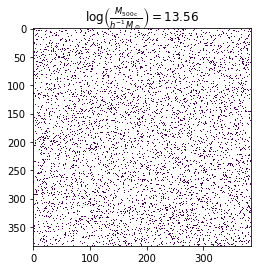

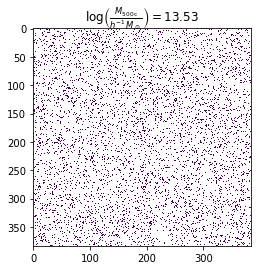

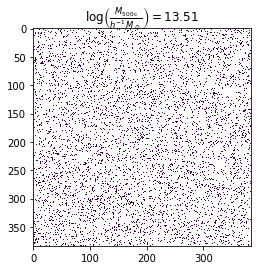

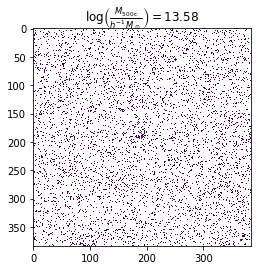

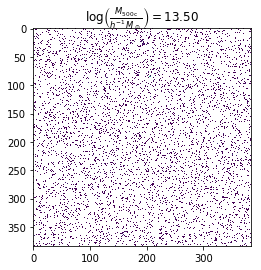

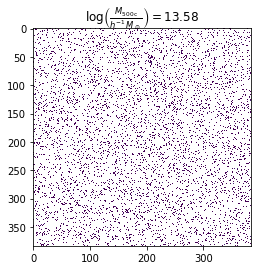

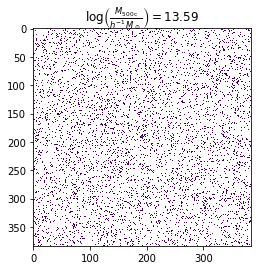

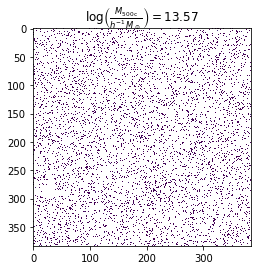

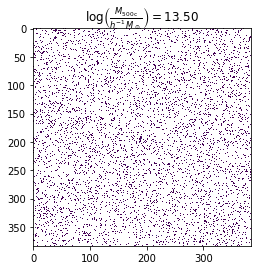

In [22]:
#open and plot a couple of clusters to see what they look like:
vmin=0
vmax=3

addbackground = True
for i, id in enumerate(clusterList['id'][1:10]):
    dat = fits.open(inputdir+str(id)+'.fits')[0].data
    if addbackground == True:
        dat += np.random.poisson(lam=lam, size=dat.shape)
    plt.figure()
    plt.imshow(np.log10(dat), vmin=vmin, vmax=vmax)
    ind = np.argwhere(clusterList['id']==id).flatten()[0]
    plt.title(r'$\log\left(\frac{M_\mathrm{500c}}{h^{-1}\,M_\odot}\right) = $'+'{:.2f}'.format(np.log10(clusterList['M500_msolh'][ind])))
    #I found that the max pixel is a pretty good way of finding a cluster... eek!  print(np.max(dat))
    

/n/home01/mntampaka/.conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


4
3
3
4
4
4
5
3
4
4


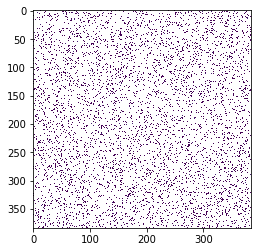

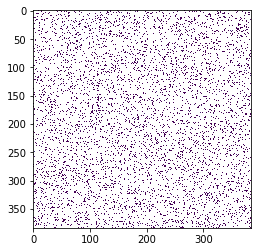

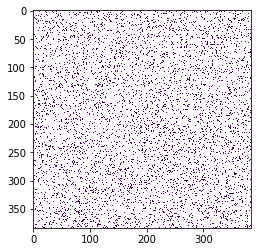

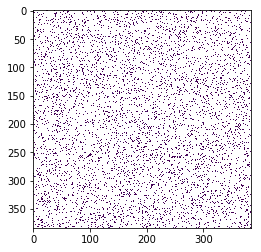

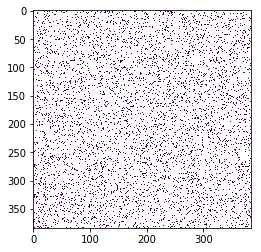

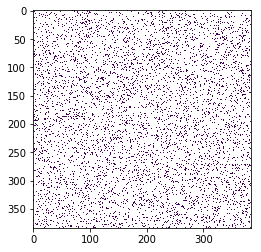

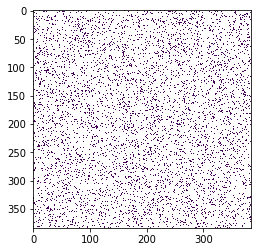

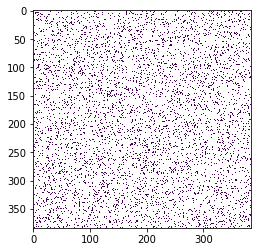

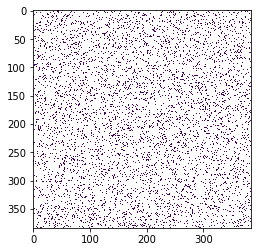

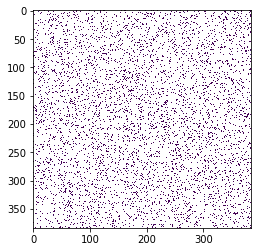

In [5]:
#make some straight-up noise:
for i in range(10):
    randomBackground = np.random.poisson(lam=lam, size=dat.shape)
    plt.figure()
    plt.imshow(np.log10(randomBackground), vmin=vmin, vmax=vmax)
    print(np.max(randomBackground))